In [605]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, datetime
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [606]:
train=pd.read_csv("train.csv",index_col=0)
train.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
Id,,,,,,,,,,,,,,,,,,,,,
0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,2,...,2.0,3.0,0,0,0,0,0,0,0,0
1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,3,...,2.0,3.0,0,4,0,0,0,0,0,0
4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,2,...,5.0,3.0,0,0,0,0,0,0,0,0


In [607]:
test=pd.read_csv('test.csv',index_col=0)
test.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
Id,,,,,,,,,,,,,,,,,,,,,
0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [608]:
new = train["Open Date"].str.split("/", n = 2, expand = True)
train["Open Date"]= new[2]
train.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
Id,,,,,,,,,,,,,,,,,,,,,
0,2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,2,...,2.0,3.0,0,0,0,0,0,0,0,0
1,2011,Konya,Other,IL,3,4.0,4.0,4.0,2,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,3,...,2.0,3.0,0,4,0,0,0,0,0,0
4,2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,2,...,5.0,3.0,0,0,0,0,0,0,0,0


In [609]:
train['Open Date'] = train['Open Date'].astype(float, errors = 'raise')

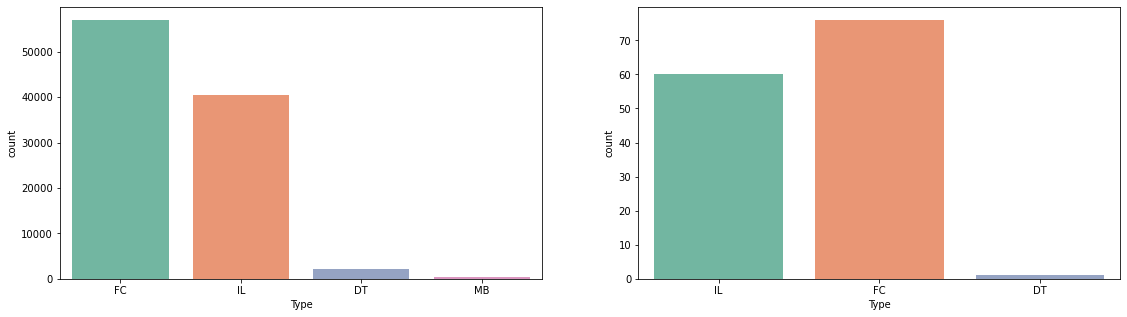

In [610]:
fig, ax = plt.subplots(1,2, figsize=(19, 5))
g1 = sns.countplot(train['Type'],palette="Set2", ax=ax[0]);
g2 = sns.countplot(test['Type'],palette="Set2", ax=ax[1]);
fig.show()

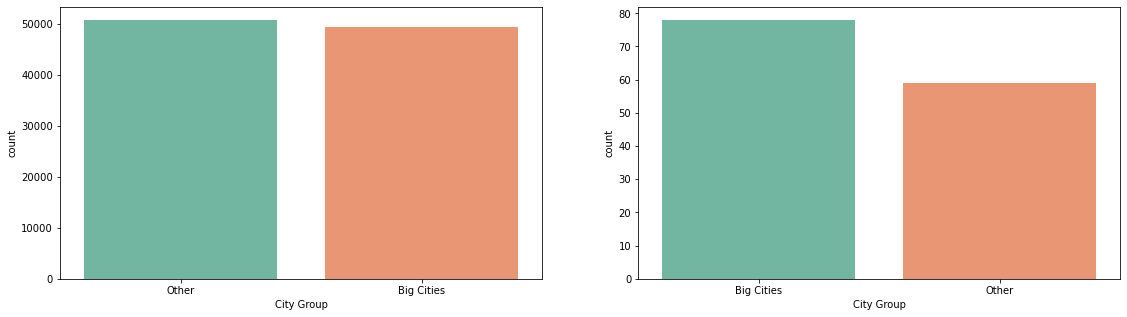

In [611]:
fig, ax = plt.subplots(1,2, figsize=(19, 5))
g1 = sns.countplot(train['City Group'],palette="Set2", ax=ax[0]);
g2 = sns.countplot(test['City Group'],palette="Set2", ax=ax[1]);
fig.show()

In [612]:
train['City Group'] = train['City Group'].map({'Big Cities':0,'Other':1})

In [613]:
train['Type'] = train['Type'].map({'FC':0,'IL':1,'DT':2,'MB':3})

In [614]:
train.head(1)

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
Id,,,,,,,,,,,,,,,,,,,,,
0,2011.0,Niğde,1,0,1,4.0,4.0,4.0,1,2,...,2.0,3.0,0,0,0,0,0,0,0,0


In [615]:
test['City Group'] = test['City Group'].map({'Big Cities':0,'Other':1})

In [616]:
test['Type'] = test['Type'].map({'FC':0,'IL':1,'DT':2})

In [618]:
test.head(1)

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
Id,,,,,,,,,,,,,,,,,,,,,
0,07/17/1999,İstanbul,0,1,4,5.0,4.0,4.0,2,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0


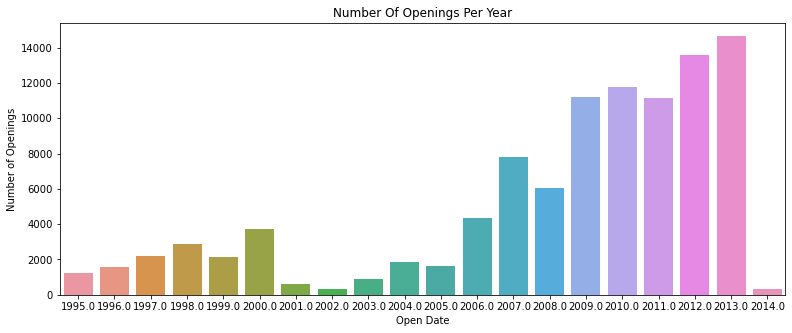

In [619]:
plt.figure(figsize=(13,5))
sns.countplot(x='Open Date',data=train)
plt.ylabel('Number of Openings')
plt.title('Number Of Openings Per Year')
plt.show()

###### Maximum Number of Restaurants Openend in the year 2013

In [620]:
new = test["Open Date"].str.split("/", n = 2, expand = True)
test["Open Date"]= new[2]
test.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
Id,,,,,,,,,,,,,,,,,,,,,
0,1999,İstanbul,0,1,4,5.0,4.0,4.0,2,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,2008,Ankara,0,0,4,5.0,4.0,4.0,1,2,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2013,Diyarbakır,1,1,2,4.0,2.0,5.0,2,3,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,2012,Tokat,1,1,6,4.5,6.0,6.0,4,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,2009,Gaziantep,1,1,3,4.0,3.0,4.0,2,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


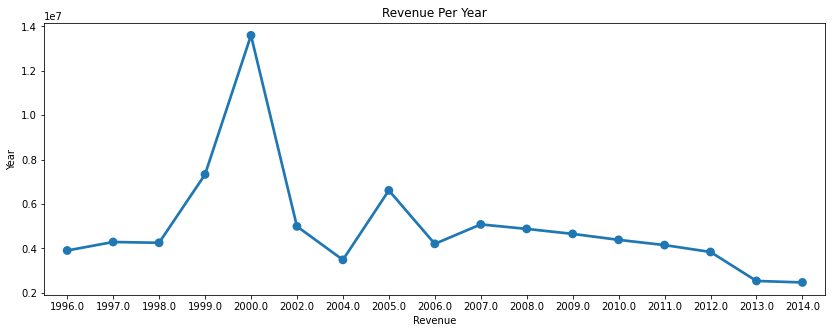

In [621]:
test['Open Date'] = test['Open Date'].astype(float, errors = 'raise')
plt.figure(figsize=(14,5))
year_revenue_means=test.groupby('Open Date')['revenue'].mean()
sns.pointplot(year_revenue_means.index,year_revenue_means.values)
plt.xlabel('Revenue')
plt.ylabel('Year')
plt.title('Revenue Per Year')
plt.show()

1) The Year 1999 and 2000 witnesed the highest revenues while there is a constant decrease in revenue from year 2007.
2) The year 2013 and 14 had the lowest revenues which might be due to lesser number of samples.

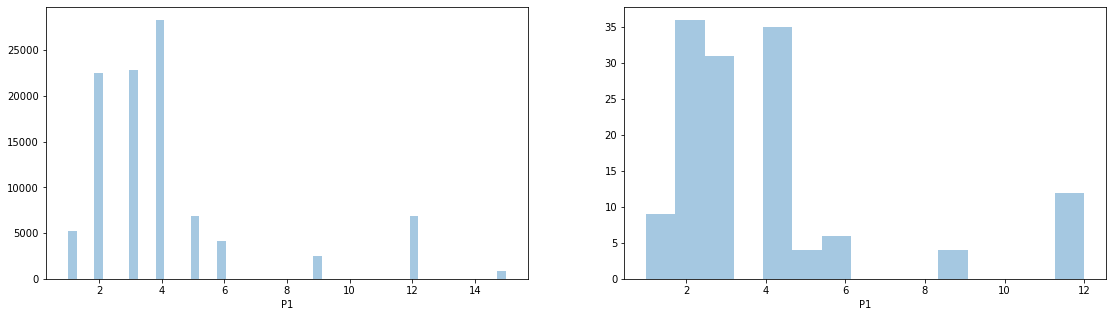

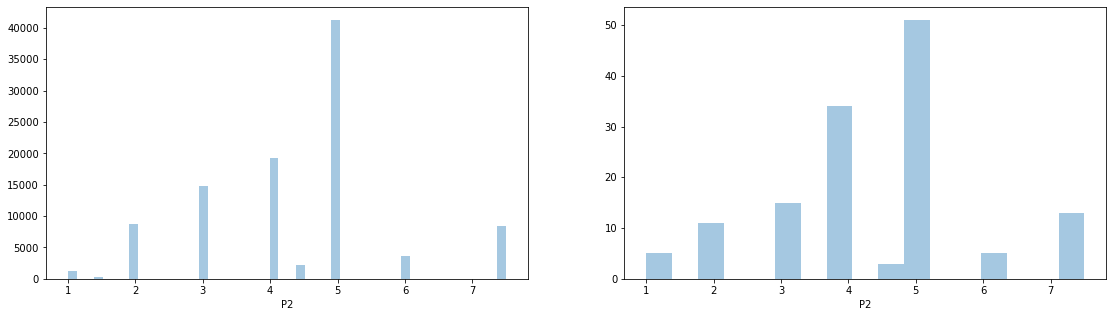

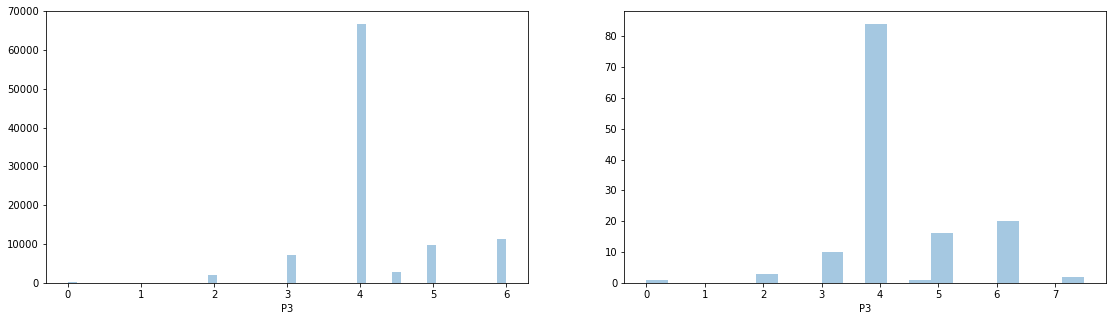

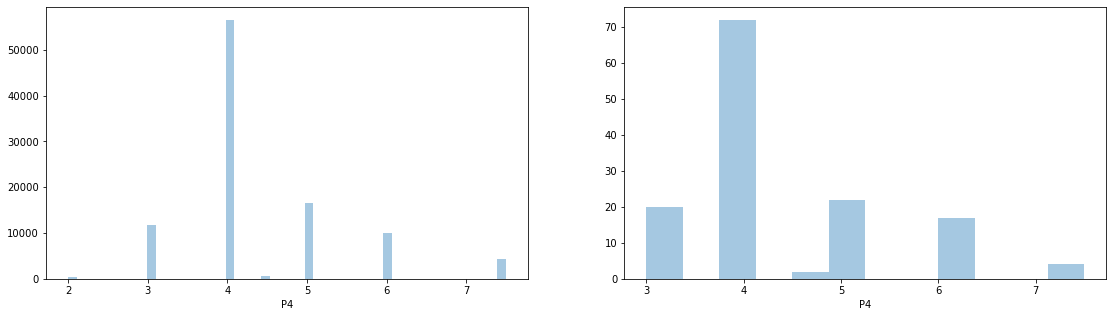

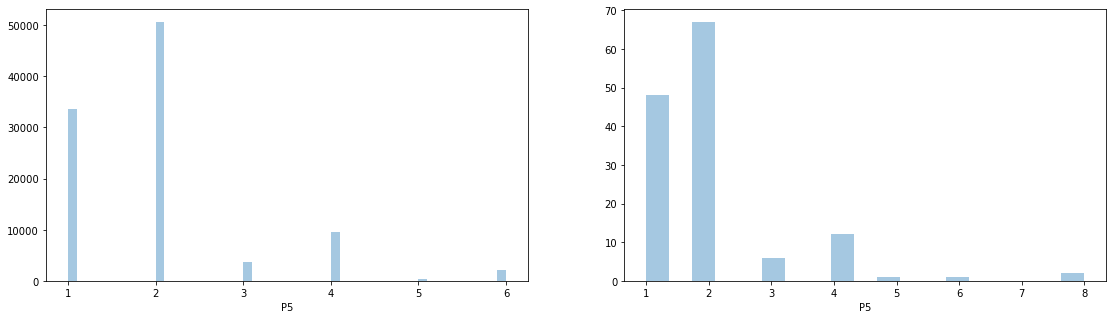

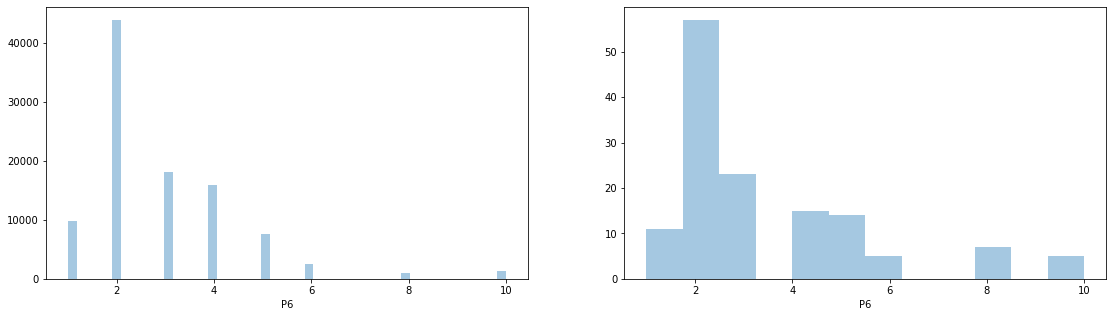

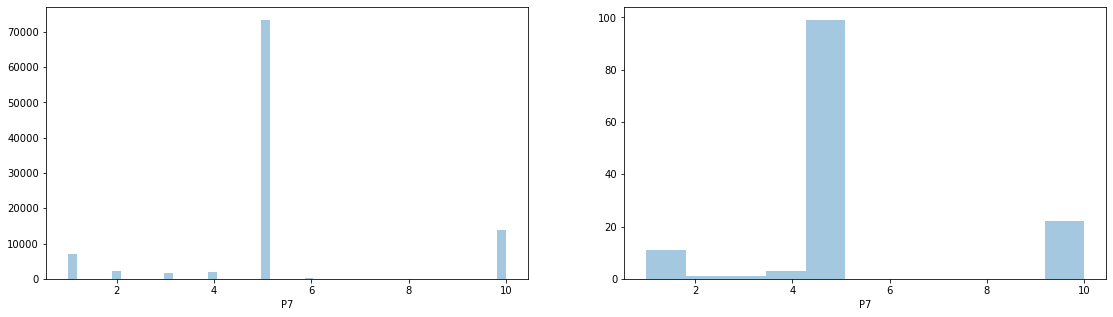

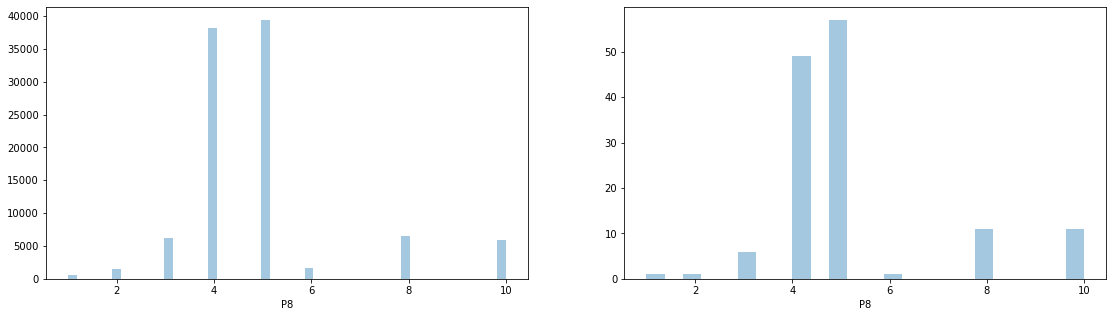

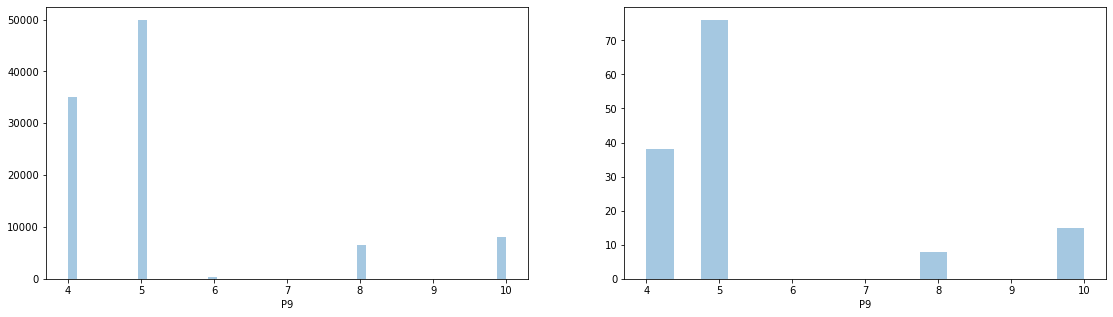

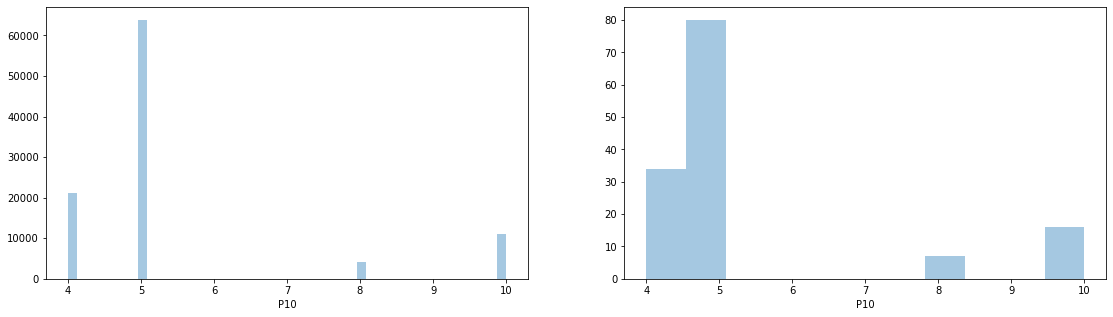

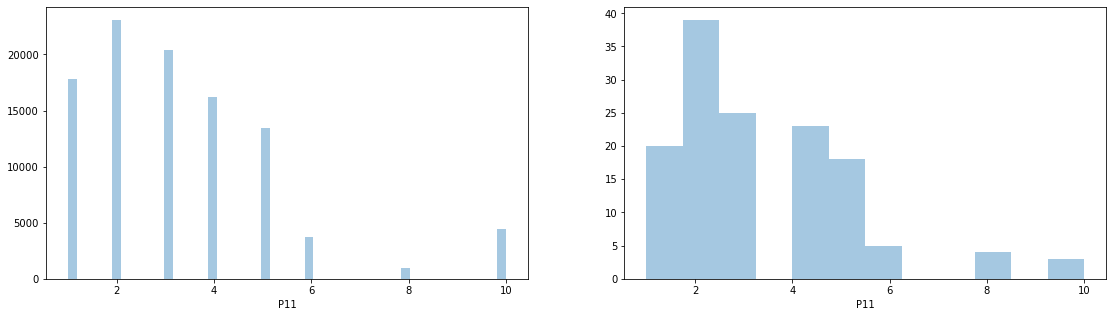

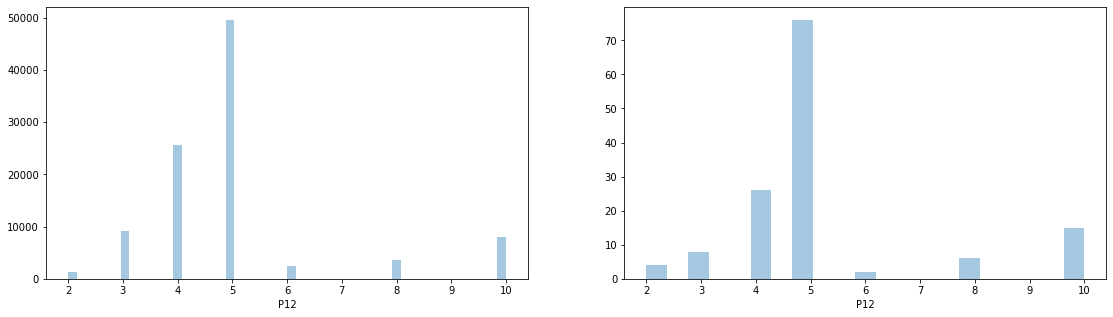

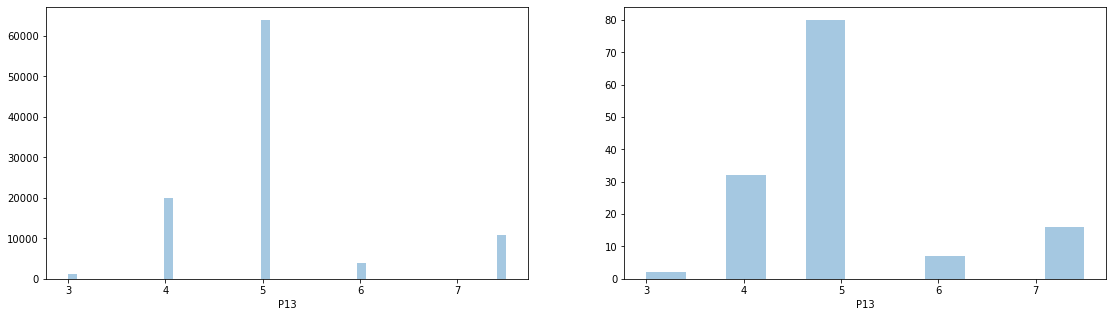

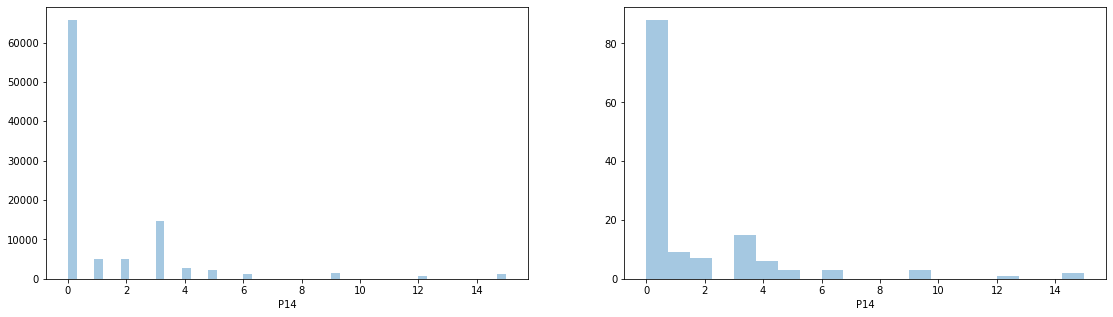

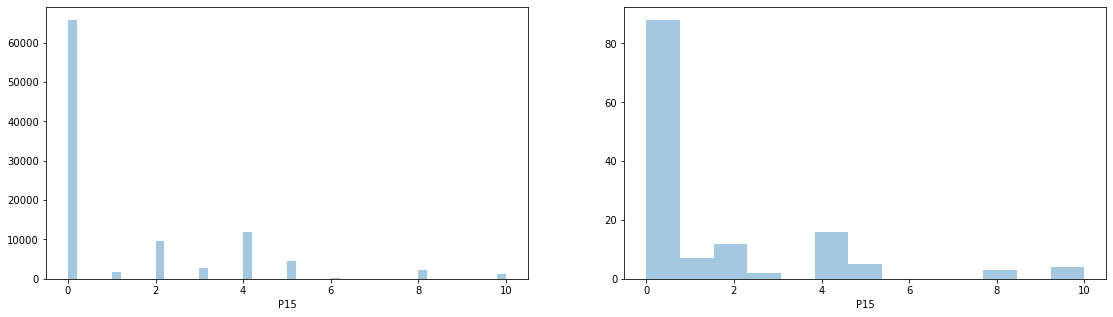

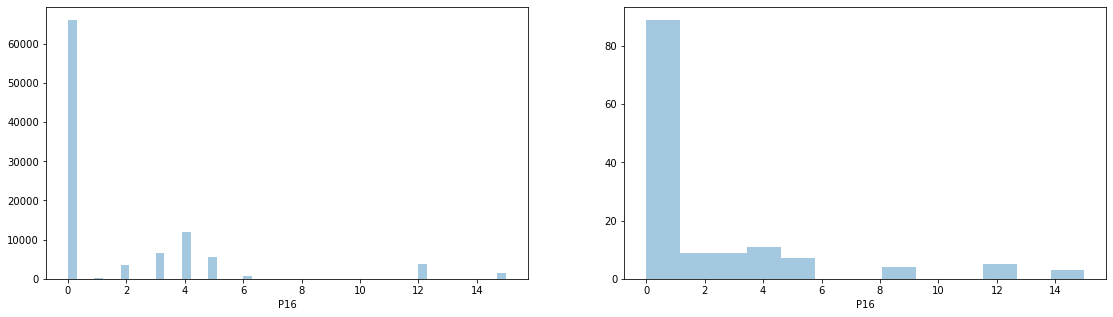

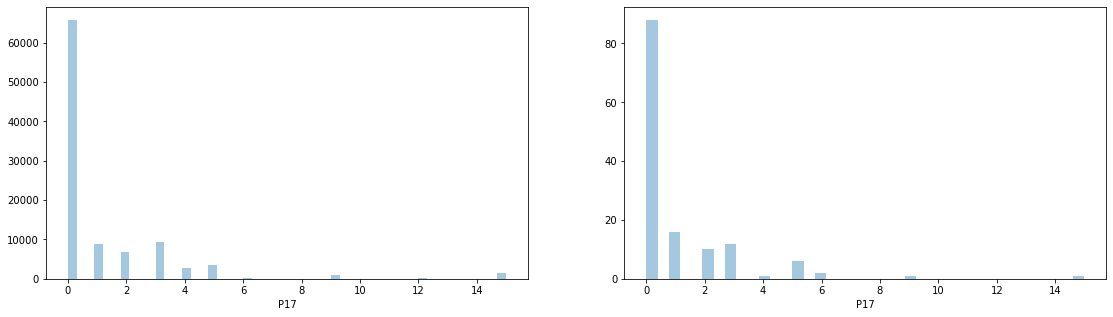

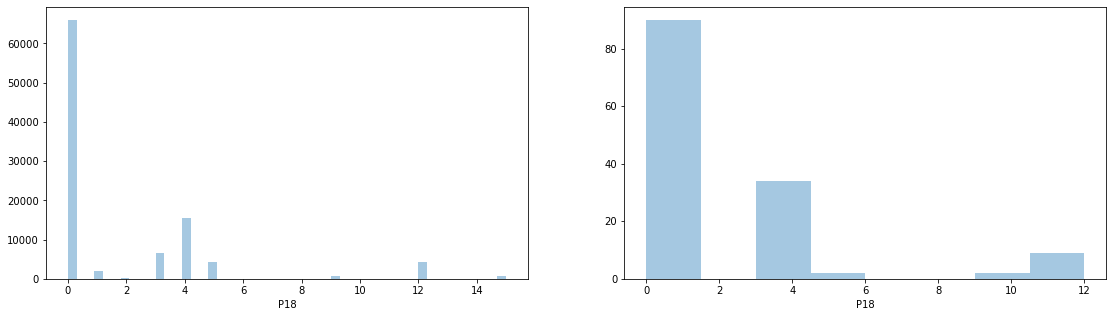

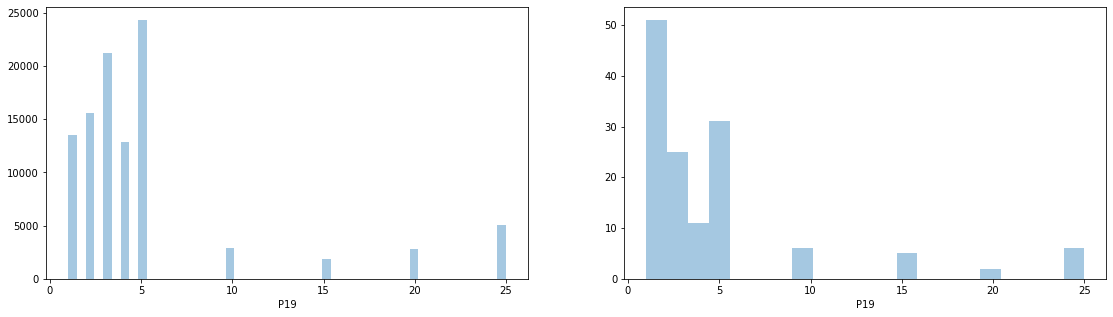

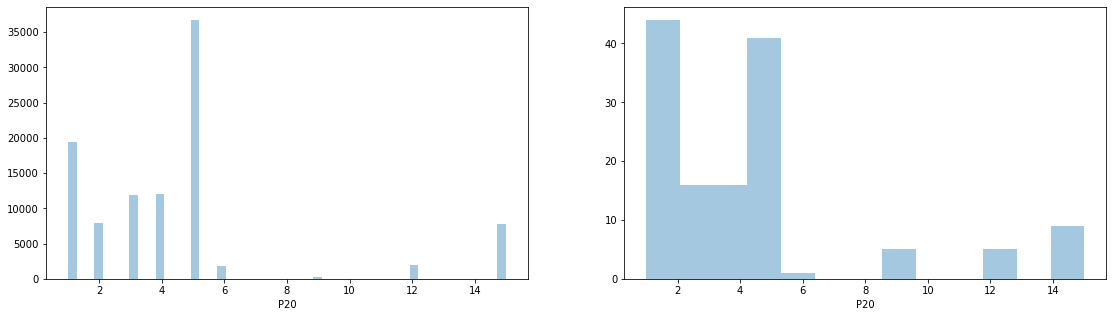

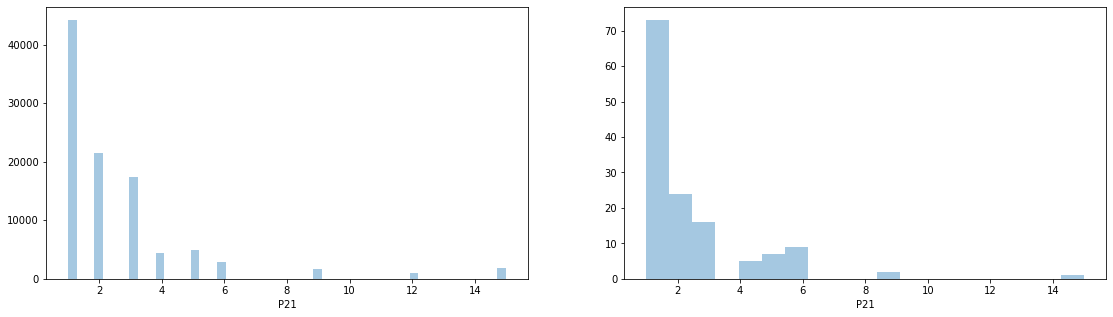

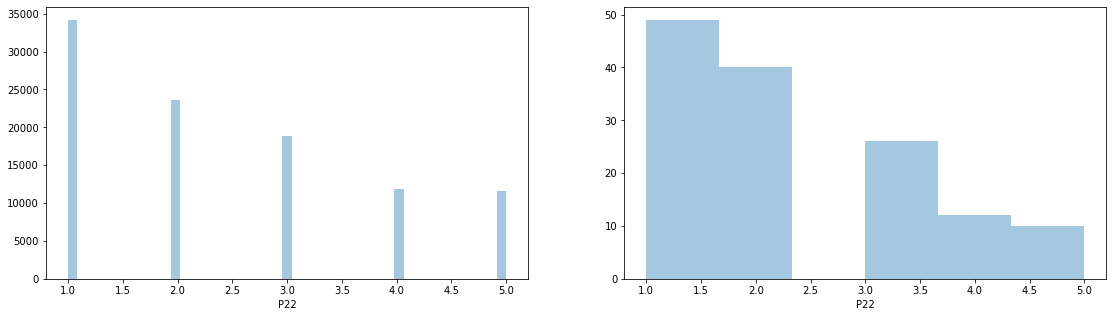

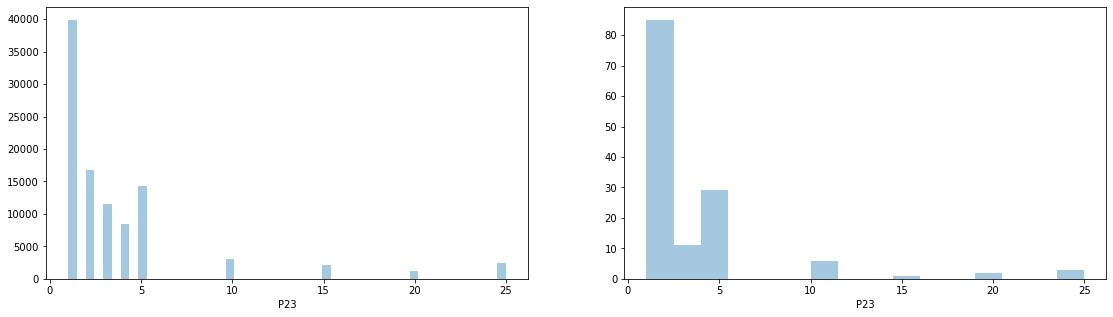

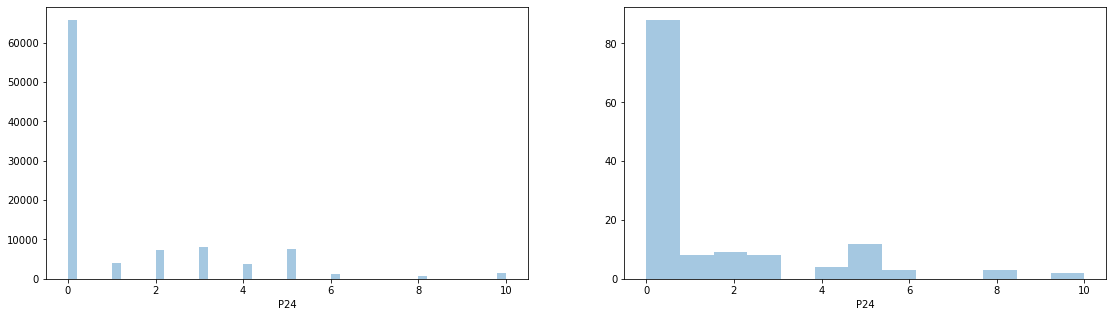

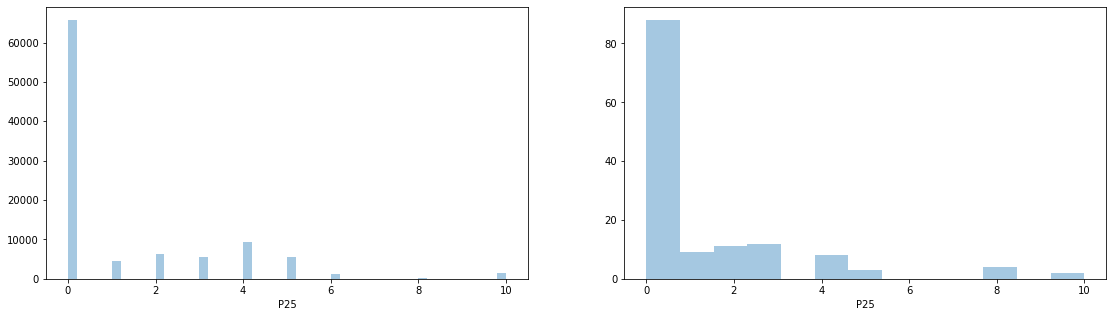

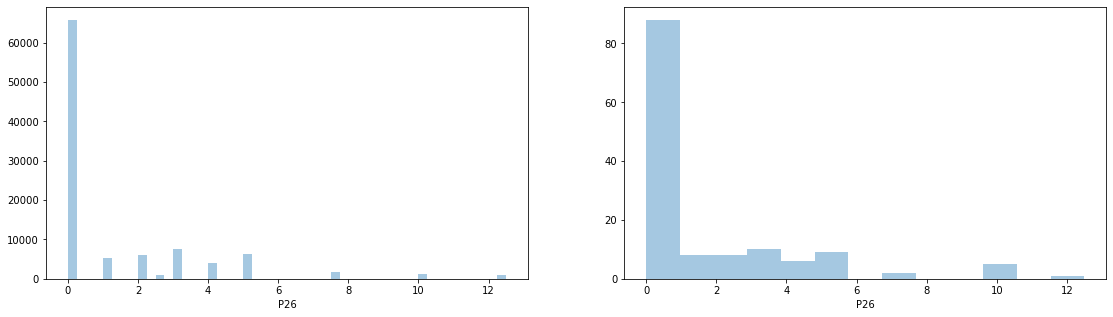

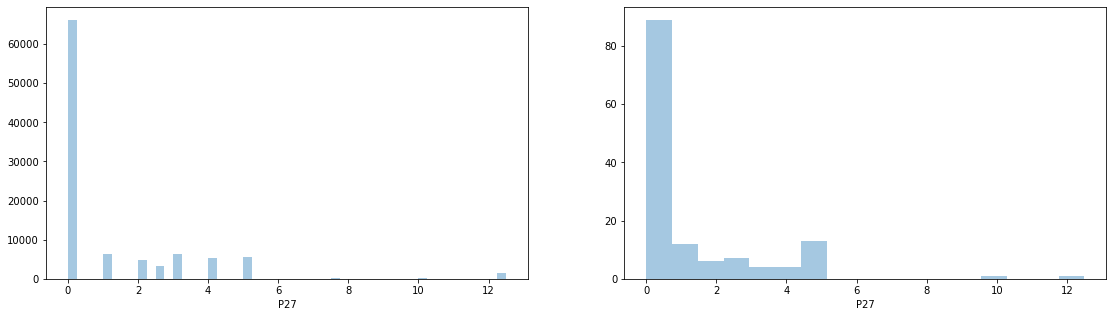

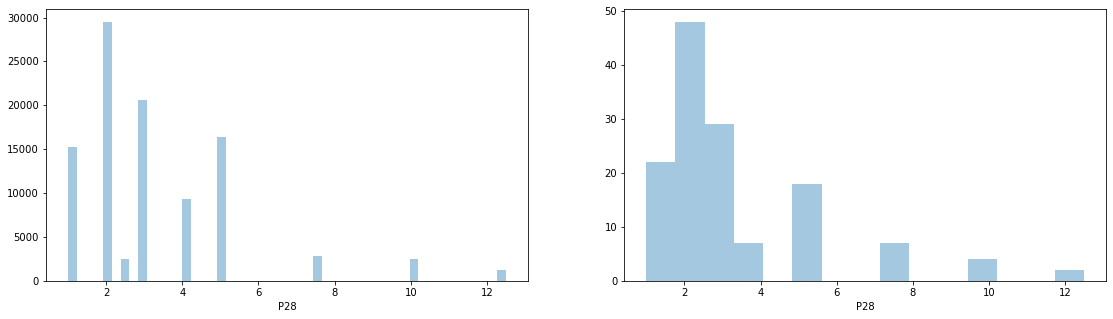

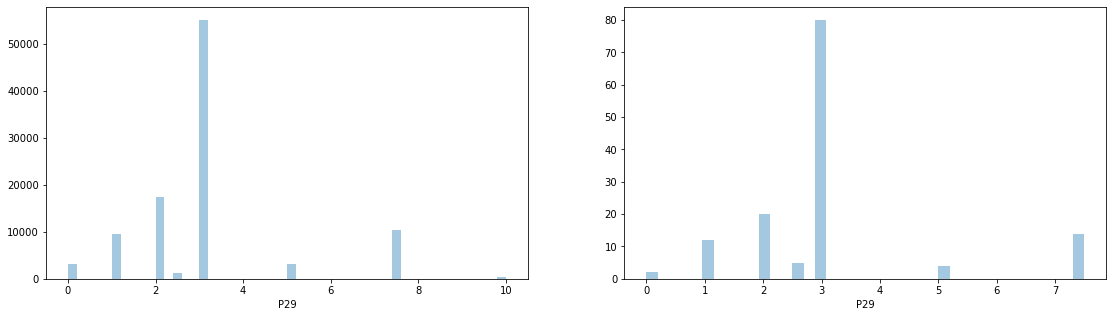

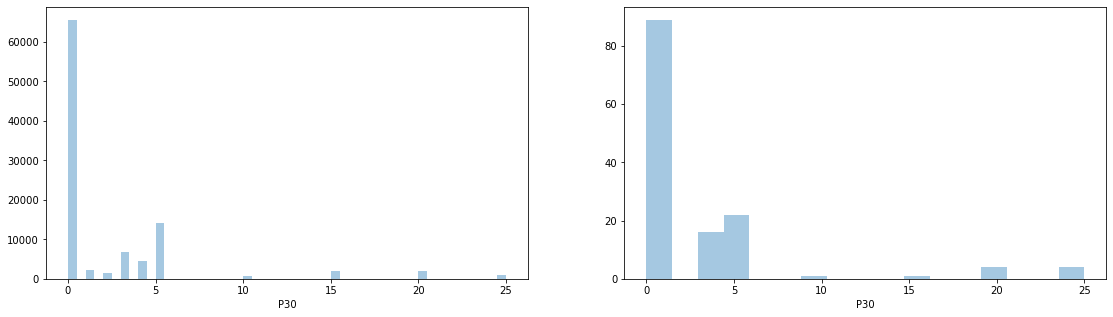

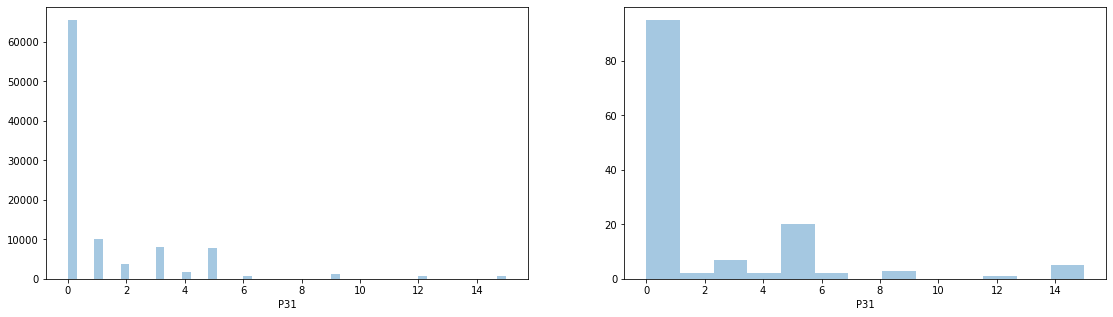

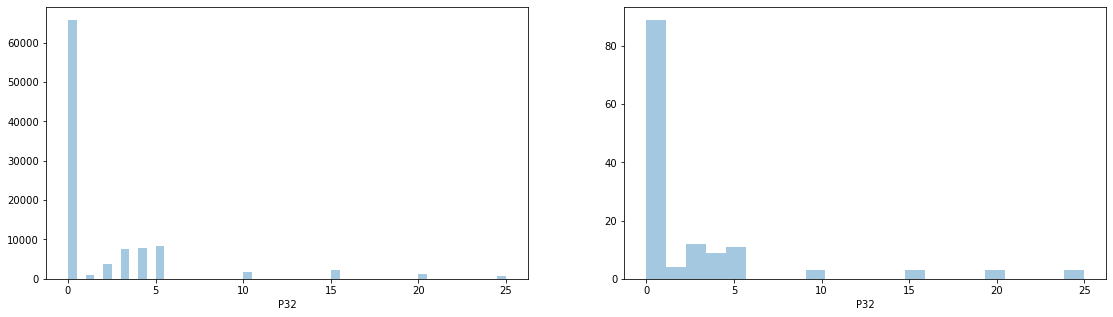

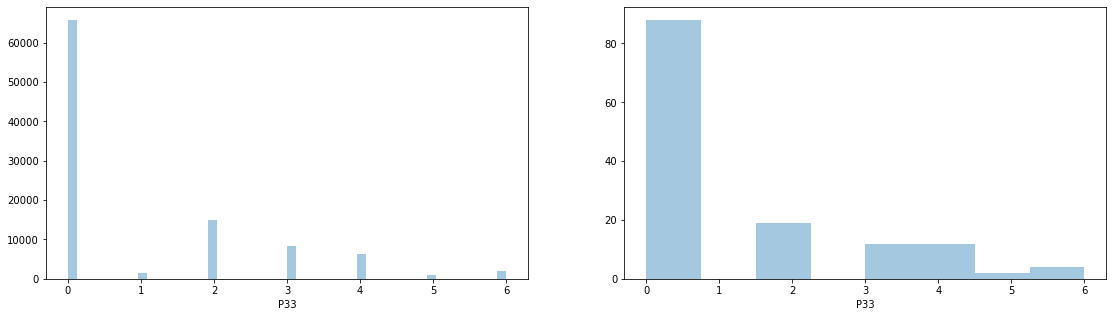

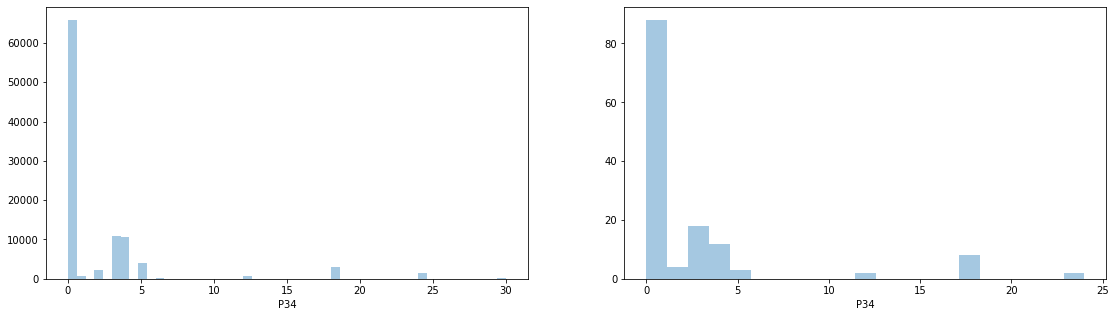

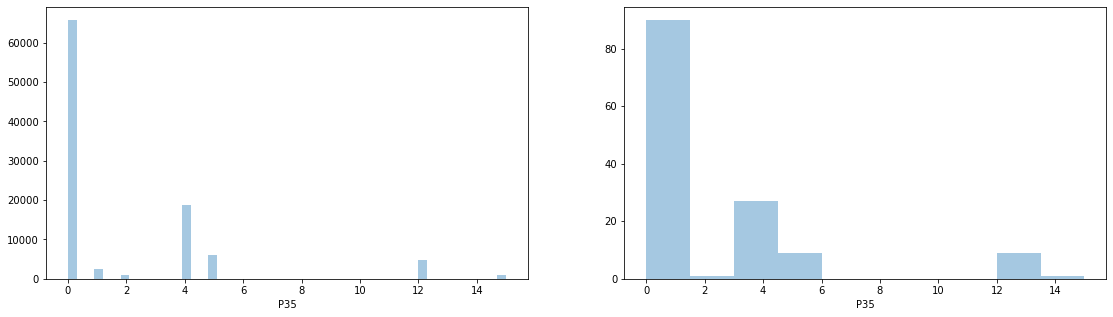

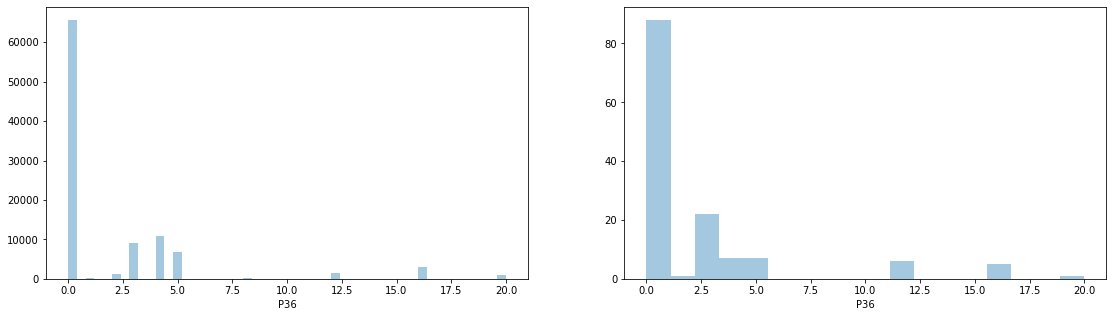

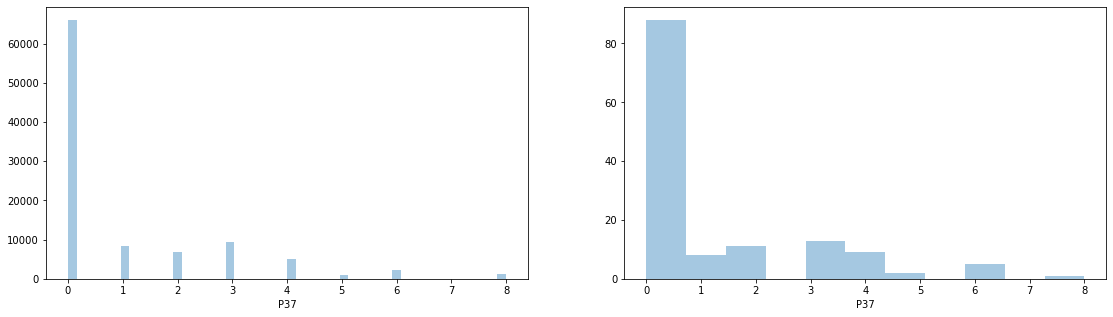

In [622]:
plt.rc('figure', max_open_warning = 0)
for i in range(1,38):
    fig, ax = plt.subplots(1,2, figsize=(19, 5))
    g1 = sns.distplot(train['P{}'.format(i)], ax=ax[0], kde=False);
    g2 = sns.distplot(test['P{}'.format(i)], ax=ax[1], kde=False);
    fig.show()

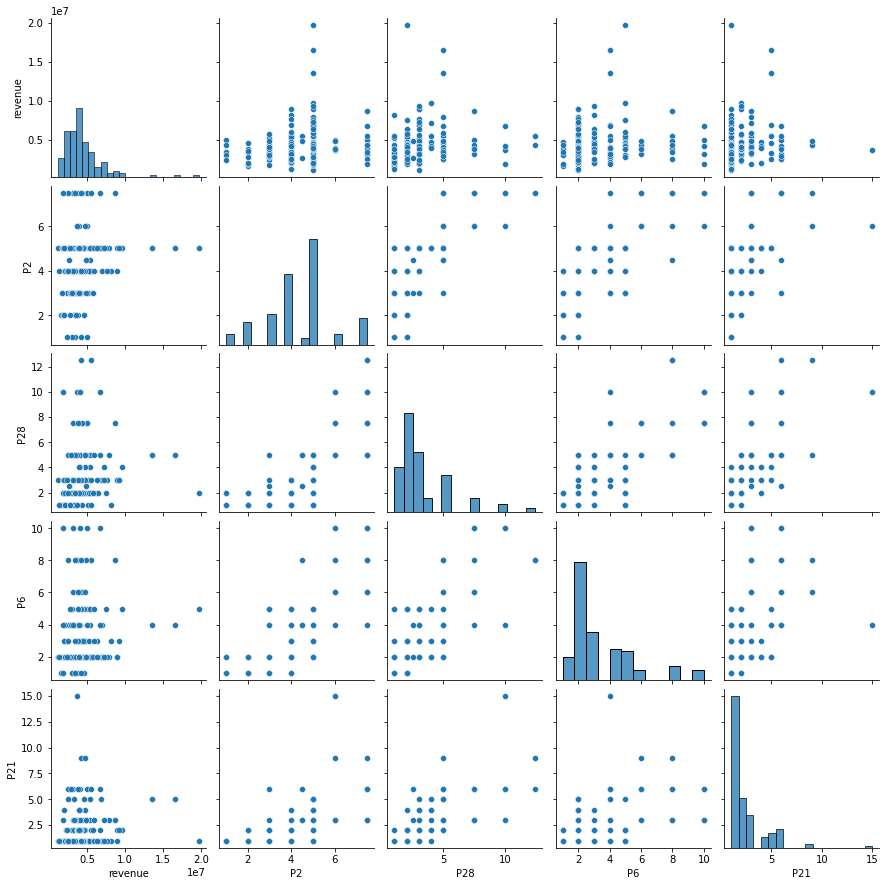

In [623]:
sns.pairplot(test[test.corr()['revenue'].sort_values(ascending=False).index[:5]])
plt.show();

In [624]:
test.columns

Index(['Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4', 'P5',
       'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16',
       'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26',
       'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36',
       'P37', 'revenue'],
      dtype='object')

In [714]:
x=test[[ 'P1', 'P2', 'P3', 'P4', 'P5',
       'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16',
       'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26',
       'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36',
       'P37']]

In [715]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137 entries, 0 to 136
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   P1      137 non-null    int64  
 1   P2      137 non-null    float64
 2   P3      137 non-null    float64
 3   P4      137 non-null    float64
 4   P5      137 non-null    int64  
 5   P6      137 non-null    int64  
 6   P7      137 non-null    int64  
 7   P8      137 non-null    int64  
 8   P9      137 non-null    int64  
 9   P10     137 non-null    int64  
 10  P11     137 non-null    int64  
 11  P12     137 non-null    int64  
 12  P13     137 non-null    float64
 13  P14     137 non-null    int64  
 14  P15     137 non-null    int64  
 15  P16     137 non-null    int64  
 16  P17     137 non-null    int64  
 17  P18     137 non-null    int64  
 18  P19     137 non-null    int64  
 19  P20     137 non-null    int64  
 20  P21     137 non-null    int64  
 21  P22     137 non-null    int64  
 22  P2

In [716]:
y=test['revenue']

In [717]:
x.shape

(137, 37)

In [718]:
y.shape

(137,)

##### 1. splitting teh data

In [719]:
from sklearn.model_selection import train_test_split

In [720]:
xtrain , xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=10)

In [721]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 121 to 9
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   P1      102 non-null    int64  
 1   P2      102 non-null    float64
 2   P3      102 non-null    float64
 3   P4      102 non-null    float64
 4   P5      102 non-null    int64  
 5   P6      102 non-null    int64  
 6   P7      102 non-null    int64  
 7   P8      102 non-null    int64  
 8   P9      102 non-null    int64  
 9   P10     102 non-null    int64  
 10  P11     102 non-null    int64  
 11  P12     102 non-null    int64  
 12  P13     102 non-null    float64
 13  P14     102 non-null    int64  
 14  P15     102 non-null    int64  
 15  P16     102 non-null    int64  
 16  P17     102 non-null    int64  
 17  P18     102 non-null    int64  
 18  P19     102 non-null    int64  
 19  P20     102 non-null    int64  
 20  P21     102 non-null    int64  
 21  P22     102 non-null    int64  
 22  P2

In [722]:
xtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 75 to 20
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   P1      35 non-null     int64  
 1   P2      35 non-null     float64
 2   P3      35 non-null     float64
 3   P4      35 non-null     float64
 4   P5      35 non-null     int64  
 5   P6      35 non-null     int64  
 6   P7      35 non-null     int64  
 7   P8      35 non-null     int64  
 8   P9      35 non-null     int64  
 9   P10     35 non-null     int64  
 10  P11     35 non-null     int64  
 11  P12     35 non-null     int64  
 12  P13     35 non-null     float64
 13  P14     35 non-null     int64  
 14  P15     35 non-null     int64  
 15  P16     35 non-null     int64  
 16  P17     35 non-null     int64  
 17  P18     35 non-null     int64  
 18  P19     35 non-null     int64  
 19  P20     35 non-null     int64  
 20  P21     35 non-null     int64  
 21  P22     35 non-null     int64  
 22  P23

In [723]:
ytrain.shape

(102,)

In [724]:
ytest.shape

(35,)

In [725]:
xtrain.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
Id,,,,,,,,,,,,,,,,,,,,,
121,2,4.0,4.0,4.0,2,3,5,5,5,4,...,2.0,3.0,0,0,0,0,0,0,0,0
29,1,1.0,4.0,4.0,2,1,1,4,4,4,...,1.0,3.0,0,0,0,0,0,0,0,0
3,6,4.5,6.0,6.0,4,4,10,8,10,10,...,2.5,7.5,25,12,10,6,18,12,12,6
87,5,5.0,4.0,4.0,1,3,5,5,4,4,...,5.0,2.0,0,0,0,0,0,0,0,0
81,2,4.0,4.0,4.0,1,3,5,4,5,5,...,2.0,3.0,0,0,0,0,0,0,0,0


##### 2.creating the machine learing model

In [726]:
from sklearn.linear_model import LinearRegression

In [727]:
model =LinearRegression().fit(xtrain,ytrain)

##### 3. training the model with training data

In [728]:
model.score(xtest,ytest)

0.03224675799647647

In [729]:
model.coef_

array([ -148111.21800465,   741640.26967361,   -39316.47575206,
        -218960.83001993,   -13277.41550472,   326911.76158773,
         -97627.17470264, -1447020.82979665,  1511647.63481587,
        -654051.52004745,  -229013.23328727,   195958.17880466,
        -606854.86100746,  -326804.94273299,   445324.12294046,
        -641335.62281749,   210375.09692224,   305188.22523591,
          30298.40063784,  -284781.58391489,   254423.58824762,
        -369973.07089774,    92954.82838836,   525739.09891622,
         839089.39229791, -1361224.92306613,   157256.77719906,
         608983.02717646,   201896.73805035,    55455.44084421,
          77094.50149312,    12251.90016459,  -841441.0813557 ,
         441772.12151237,   -13309.96831664,  -290404.498935  ,
         308071.78308371])

In [730]:
pd.DataFrame(model.coef_,columns=['coef_'],index=x.columns)

,coef_
P1,-1.481112e+05
P2,7.416403e+05
P3,-3.931648e+04
P4,-2.189608e+05
P5,-1.327742e+04
P6,3.269118e+05
P7,-9.762717e+04
P8,-1.447021e+06
P9,1.511648e+06
P10,-6.540515e+05


##### 4. evaluation

In [731]:
print('%.1f%%'%(model.score(xtest,ytest)*100))

3.2%


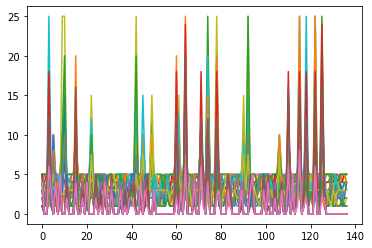

In [732]:
plt.plot(x)

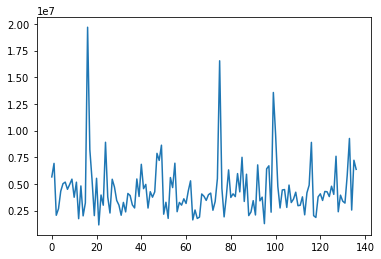

In [733]:

plt.plot(y)

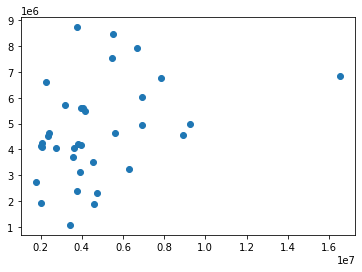

In [734]:
ypred = model.predict(xtest)
plt.scatter(ytest,ypred)


In [735]:

import numpy as np

In [736]:

len(x)

137

In [737]:

len(y)

137

In [741]:
import seaborn as sns

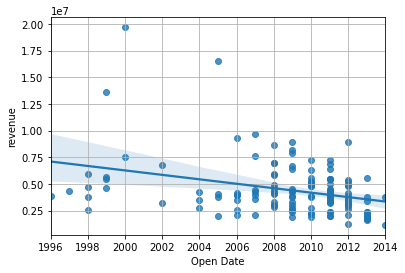

In [745]:
sns.regplot(x='Open Date',y='revenue',data=test)
plt.grid()

In [750]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.25, random_state=101)

In [751]:

from sklearn.linear_model import LinearRegression

In [752]:
model = LinearRegression().fit(xtrain,ytrain)

In [753]:

100* model.score(xtest, ytest)

-19.16457361796178

In [756]:
import numpy as np

<AxesSubplot:xlabel='Open Date', ylabel='revenue'>

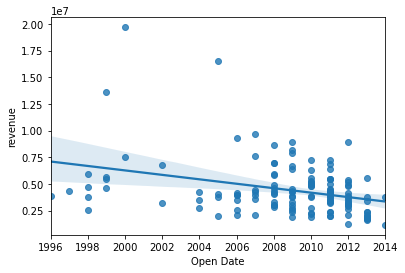

In [757]:
sns.regplot(x='Open Date',y='revenue',data=test)

In [758]:
x

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
Id,,,,,,,,,,,,,,,,,,,,,
0,4,5.0,4.0,4.0,2,2,5,4,5,5,...,2.0,3.0,5,3,4,5,5,4,3,4
1,4,5.0,4.0,4.0,1,2,5,5,5,5,...,3.0,3.0,0,0,0,0,0,0,0,0
2,2,4.0,2.0,5.0,2,3,5,5,5,5,...,1.0,3.0,0,0,0,0,0,0,0,0
3,6,4.5,6.0,6.0,4,4,10,8,10,10,...,2.5,7.5,25,12,10,6,18,12,12,6
4,3,4.0,3.0,4.0,2,2,5,5,5,5,...,1.0,3.0,5,1,3,2,3,4,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,2,3.0,3.0,5.0,4,2,4,4,4,4,...,2.0,3.0,0,0,0,0,0,0,0,0
133,4,5.0,4.0,4.0,2,3,5,4,4,5,...,3.0,3.0,0,0,0,0,0,0,0,0
134,3,4.0,4.0,4.0,2,3,5,5,5,5,...,2.0,3.0,0,0,0,0,0,0,0,0


In [759]:

model = LinearRegression().fit(x,y)
100*model.score(x,y)

29.020445161234242

In [760]:
from sklearn.preprocessing import PolynomialFeatures

In [761]:

x_poly = PolynomialFeatures().fit_transform(x)
x_poly

array([[ 1.,  4.,  5., ...,  9., 12., 16.],
       [ 1.,  4.,  5., ...,  0.,  0.,  0.],
       [ 1.,  2.,  4., ...,  0.,  0.,  0.],
       ...,
       [ 1.,  3.,  4., ...,  0.,  0.,  0.],
       [ 1.,  4.,  5., ...,  0.,  0.,  0.],
       [ 1.,  4.,  5., ...,  0.,  0.,  0.]])

In [762]:
x_poly3 = PolynomialFeatures(degree=3).fit_transform(x)
x_poly3

array([[ 1.,  4.,  5., ..., 36., 48., 64.],
       [ 1.,  4.,  5., ...,  0.,  0.,  0.],
       [ 1.,  2.,  4., ...,  0.,  0.,  0.],
       ...,
       [ 1.,  3.,  4., ...,  0.,  0.,  0.],
       [ 1.,  4.,  5., ...,  0.,  0.,  0.],
       [ 1.,  4.,  5., ...,  0.,  0.,  0.]])

In [763]:

xtrain2, xtest2, ytrain2, ytest2 = train_test_split(x_poly, y, test_size=0.25, random_state=101)

In [764]:

model2 = LinearRegression().fit(x_poly, y)
100*model2.score(x_poly, y)

88.77349009098654

In [765]:
model3 = LinearRegression().fit(x_poly3, y)
100*model3.score(x_poly3, y)

88.77349009098654

In [766]:
ypred = model3.predict(x_poly3)

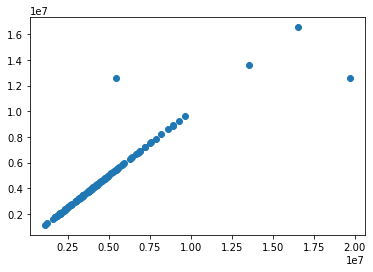

In [767]:
plt.scatter(y,ypred)